In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_450634d1d694456a979b5dcbe8a5a9df = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='d3G6-9qbRwk0QzcpzWy3qGruwtE132mjJGU3TuUkFPQL',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_450634d1d694456a979b5dcbe8a5a9df.get_object(Bucket='populationregression-donotdelete-pr-t1yq0ytryodtoi',Key='India_population.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dataset = pd.read_csv(body)
dataset.head()


,Year,Avg_Population
0,1981,716493000
1,1982,733152000
2,1983,750034000
3,1984,767147000
4,1985,784491000


In [3]:
dataset.dropna()

,Year,Avg_Population
0,1981,716493000
1,1982,733152000
2,1983,750034000
3,1984,767147000
4,1985,784491000
5,1986,802052000
6,1987,819800000
7,1988,837700000
8,1989,855707000
9,1990,873785000


In [4]:
dataset.isnull().any()

Year              False
Avg_Population    False
dtype: bool

In [5]:
indep=dataset.iloc[:,0:1] # independent variables
indep

,Year
0,1981
1,1982
2,1983
3,1984
4,1985
5,1986
6,1987
7,1988
8,1989
9,1990


In [6]:
dep=dataset.iloc[:,1:] # dependent variables
dep

,Avg_Population
0,716493000
1,733152000
2,750034000
3,767147000
4,784491000
5,802052000
6,819800000
7,837700000
8,855707000
9,873785000


In [7]:
indep=indep.values
indep

array([[1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

In [8]:
dep=dep.values
dep

array([[ 716493000],
       [ 733152000],
       [ 750034000],
       [ 767147000],
       [ 784491000],
       [ 802052000],
       [ 819800000],
       [ 837700000],
       [ 855707000],
       [ 873785000],
       [ 891910000],
       [ 910065000],
       [ 928226000],
       [ 946373000],
       [ 964486000],
       [ 982553000],
       [1000558000],
       [1018471000],
       [1036259000],
       [1053898000],
       [1071374000],
       [1088694000],
       [1105886000],
       [1122991000],
       [1140043000],
       [1157039000],
       [1134024000],
       [1150196000],
       [1166228000],
       [1182108000],
       [1197658000],
       [1212827000],
       [1227012000],
       [1233542000]])

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
indep_poly=poly_reg.fit_transform(indep)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#poly_reg=PolynomialFeatures(degree=4)
#indep_poly=poly_reg.fit_transform(indep)
from sklearn.pipeline import Pipeline #pipelining  
pipe=Pipeline([('poly',PolynomialFeatures(degree=4)),('reg',LinearRegression())])

In [10]:
indep.shape

(34, 1)

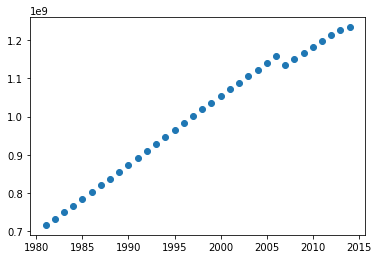

In [11]:
plt.scatter(indep,dep)


In [12]:
#pipe.fit(indep_poly,dep)
pipe.fit(indep,dep)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

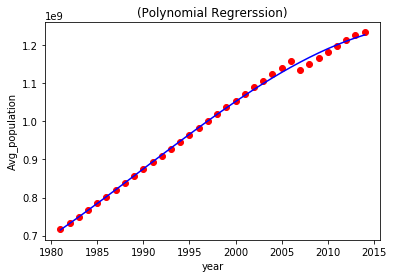

In [13]:
#indep_grid=np.arrange(min(indep),max(indep),0.1)
plt.scatter(indep,dep,color = 'red')
#plt.plot(indep,pipe.predict(poly_reg.fit_transform(indep)),color = 'blue')
plt.plot(indep,pipe.predict(indep),color = 'blue')
plt.title('(Polynomial Regrerssion)')
plt.xlabel('year')
plt.ylabel('Avg_population')
plt.show()

In [14]:
dep_predict=pipe.predict(indep)
dep_predict

array([[7.15018553e+08],
       [7.32001177e+08],
       [7.49275808e+08],
       [7.66805642e+08],
       [7.84553818e+08],
       [8.02483418e+08],
       [8.20557471e+08],
       [8.38738945e+08],
       [8.56990756e+08],
       [8.75275762e+08],
       [8.93556766e+08],
       [9.11796514e+08],
       [9.29957696e+08],
       [9.48002946e+08],
       [9.65894843e+08],
       [9.83595907e+08],
       [1.00106861e+09],
       [1.01827535e+09],
       [1.03517849e+09],
       [1.05174032e+09],
       [1.06792309e+09],
       [1.08368898e+09],
       [1.09900012e+09],
       [1.11381858e+09],
       [1.12810639e+09],
       [1.14182549e+09],
       [1.15493780e+09],
       [1.16740517e+09],
       [1.17918939e+09],
       [1.19025218e+09],
       [1.20055525e+09],
       [1.21006020e+09],
       [1.21872861e+09],
       [1.22652198e+09]])

In [15]:
#dep_predict=pipe.predict(poly_reg.fit_transform([[1982]]))
dep_predict=pipe.predict([[1982]])
dep_predict

array([[7.32001177e+08]])

In [16]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [17]:
wml_credentials={
  "apikey": "GYcSWFWKfkqMq6nxGlVjCdVbz0ZnGria2eSpKT2_07J0",
  "iam_apikey_description": "Auto-generated for key 21db0d0b-e16e-4539-b9b8-f34809eb4070",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/801e23ab3b4f4d83a2754f61ec0b369f::serviceid:ServiceId-c28242b5-b55e-46bc-966c-dfc3e523e376",
  "instance_id": "35c54977-26d0-4d8b-bb01-7f2514332370",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [18]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [19]:
metadata ={ 
    client.repository.ModelMetaNames.DESCRIPTION:'India_population.csv',
    client.repository.ModelMetaNames.AUTHOR_NAME : 'mahalakshmi',
    client.repository.ModelMetaNames.NAME:"Population prediction",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:'0.19'
}

In [20]:
model_details=client.repository.store_model(pipe,meta_props= metadata)

In [21]:
published_model_uid=client.repository.get_model_uid(model_details)
published_model_uid

'e8d6acd7-760a-42f8-aa05-81cbc1d8ec3a'

In [22]:
created_deployment=client.deployments.create(published_model_uid,name="Population prediction")



#######################################################################################

Synchronous deployment creation for uid: 'e8d6acd7-760a-42f8-aa05-81cbc1d8ec3a' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1367e4a8-2fad-4c83-8592-5b5a721bf344'
------------------------------------------------------------------------------------------------




In [23]:
scoring_endpoint=client.deployments.get_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/35c54977-26d0-4d8b-bb01-7f2514332370/deployments/1367e4a8-2fad-4c83-8592-5b5a721bf344'

In [24]:
client.deployments.list()

------------------------------------  ---------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                   TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
1367e4a8-2fad-4c83-8592-5b5a721bf344  Population prediction  online  DEPLOY_SUCCESS  2019-11-16T06:41:44.354Z  scikit-learn-0.20  model
2e5c67da-5722-4ca0-9fea-864f3b2cf48f  Population prediction  online  DEPLOY_SUCCESS  2019-11-16T06:40:55.168Z  scikit-learn-0.20  model
------------------------------------  ---------------------  ------  --------------  ------------------------  -----------------  -------------
